<a href="https://colab.research.google.com/github/takemuralab/OAcenter_ai_project/blob/main/Lesson8_kadai_icecream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# アイスクリームの購買予想モデルの作成

## 課題

　　　Prophetによる予測は、日単位の集計結果よりつきたいんいの結果の方が向いている

　　　理由　：　単位を大きくすることで、例えば天候のような変動要素の影響を薄められるから

　　　実習課題　:  「金沢アイスクリーム調査報告書」
　

　　　https://www.icecream.or.jp/biz/data/expenditures.html 

In [14]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [16]:
# 共通事前処理

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
import japanize_matplotlib

# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)

# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format

# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14

# 乱数の種
random_seed = 123

In [37]:
# データの読み込み
url2 = 'https://github.com/makaishi2/\
sample-data/blob/master/data/ice-sales.xlsx?raw=true'

df = pd.read_excel(url2, sheet_name=0)

ParserError: ignored

In [18]:
# データの確認
display(df.head())
display(df.tail())

,年月,支出
0,2015-01-01,401
1,2015-02-01,345
2,2015-03-01,480
3,2015-04-01,590
4,2015-05-01,928


,年月,支出
55,2019-08-01,1513
56,2019-09-01,996
57,2019-10-01,724
58,2019-11-01,531
59,2019-12-01,584


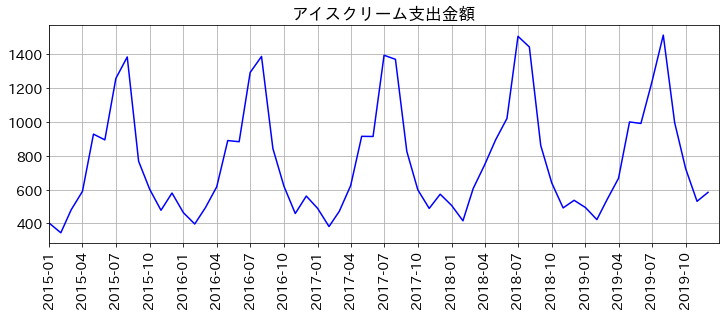

In [24]:
import matplotlib.dates as  mdates

# 時系列グラフの描画 (アイスクリーム支出金額)
fig, ax = plt.subplots(figsize=(12,4))

# グラフ描画
ax.plot(df['年月'], df['支出'], c='b')

# 3ヶ月区切りのメモリにする
month3 = mdates.MonthLocator(interval=3)
ax.xaxis.set_major_locator(month3)

# 日付表記を９０度回転
ax.tick_params(axis='x', rotation=90)

# 開始日と終了日
sday = pd.to_datetime('2015-1-1')
eday = pd.to_datetime('2019-12-31')
ax.set_xlim(sday, eday)

#　方眼表示など
ax.grid()
ax.set_title('アイスクリーム支出金額')

# 画面出力
plt.show()

In [25]:
#データの前処理
# データ形式をProphet用に合わせる
x = df.copy()
x.columns = ['ds', 'y']
display(x.head())

,ds,y
0,2015-01-01,401
1,2015-02-01,345
2,2015-03-01,480
3,2015-04-01,590
4,2015-05-01,928


In [28]:
# データ分割
# 2019年1月を基準に訓練データと検証データを分割
# 分割日　mdayの設定
mday = pd.to_datetime('2019-1-1')

# 訓練用indexと検証用indexを作る
train_index = x['ds'] < mday
test_index = x['ds'] >= mday

# 入力データの分割
x_train = x[train_index]
x_test = x[test_index]

#日付列もグラフ描画のために分割
dates_train = x['ds'][train_index]
dates_test = x['ds'][test_index]

In [29]:
# アルゴリズムの選択
# ライブラリのimport
from fbprophet import Prophet
m = Prophet(yearly_seasonality = 5, weekly_seasonality=False, daily_seasonality=False)

In [30]:
# 学習
m = m.fit(x_train)

In [31]:
# 予想
future = x[['ds']]
fcst = m.predict(future)

In [35]:
# 評価

# fcstから予測部分のみ抽出する
ypred = fcst[-12:]['yhat'].values

# 正解データのリススト
ytest = x_test['y'].values

# R値の計算
from sklearn.metrics import r2_score
score = r2_score(ytest, ypred)
score_text = f'R2 score:{score:.4f}'
print(score_text)

R2 score:0.9566


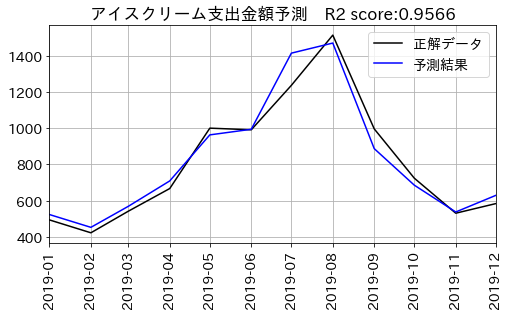

In [36]:
# 時系列グラフの描画 (アイスクリーム支出金額)
fig, ax = plt.subplots(figsize=(8, 4))

# グラフ描画
ax.plot(dates_test, ytest, label='正解データ', c='k')
ax.plot(dates_test, ypred, label='予測結果', c='b')

# 1か月区切りの目盛にする
month = mdates.MonthLocator()
ax.xaxis.set_major_locator(month)

# 日付表記を90度回転
ax.tick_params(axis='x', rotation=90)

# 開始日と終了日
sday = pd.to_datetime('2019-1-1')
eday = pd.to_datetime('2019-12-1')
ax.set_xlim(sday, eday) 

# 方眼表示など
ax.grid()
ax.legend()
ax.set_title('アイスクリーム支出金額予測　' + score_text)

# 画面出力
plt.show()